In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
def load_data():
    """"
    Load Lower Back Pain Data Set
    
    Inputs
    ------
    None
    
    Returns
    -------
    X: NumPy array of X
    y: Numpy array of y
    col_names: column names for X
    """    
    
    # Load data and drop column 'Unnamed: 13'
    data = pd.read_csv('back_pain.csv')
    data.drop('Unnamed: 13', axis=1, inplace=True)
    
    # Name columns
    data.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                    'sacral_slope', 'pelvic_radius',
                    'degree_spondylolisthesis', 'pelvic_slope', 'direct_tilt',
                    'thoracic_slope', 'cervical_tilt', 'sacrum_angle',
                    'soliosis_slope', 'state']
    
    # Make 'state' column binary
    mapping = {'Abnormal': 0, 'Normal': 1}
    data['state'] = data['state'].map(mapping)

    # Split data in X and y
    X = data.drop(['state'], axis=1)
    y = data['state']
    
    # Get col names and convert to NumPy arrays
    X_col_names = list(X)
    X = X.values
    y = y.values
    
    return data, X, y, X_col_names

In [3]:
back_pain = pd.read_csv('back_pain.csv')
back_pain.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
back_pain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [5]:
back_pain.drop('Unnamed: 13', axis=1, inplace=True)
back_pain.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope',
               'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'direct_tilt',
               'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'soliosis_slope', 'state']

In [6]:
# Check for missing data
back_pain.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
soliosis_slope              0
state                       0
dtype: int64

In [7]:
# Change 'state' column to binary
mapping = {'Abnormal': 0, 'Normal': 1}
back_pain['state'] = back_pain['state'].map(mapping)

In [8]:
back_pain.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,soliosis_slope,state
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [10]:
# Split data in X and y
X = back_pain.drop(['state'], axis=1)
y = back_pain['state']

In [11]:
def get_principal_component_model(data, n_components=0):
    """
    Principal component analysis
    
    Inputs
    ------
    data: raw data (DataFrame)
    
    Returns
    -------
    A dictionary of:
        model: pca model object
        transformed_X: transformed_data
        explained_variance: explained_variance
    """
    
    # If n_components not passed to function, use number of features in data
    if n_components == 0:
        n_components = data.shape[1]
    
    pca = PCA(n_components)
    transformed_X = pca.fit_transform(data)

    #fit_transform reduces X to the new datasize if n components is specified
    explained_variance = pca.explained_variance_ratio_
    
    # Compile a dictionary to return results
    results = {'model': pca,
               'transformed_X': transformed_X,
               'explained_variance': explained_variance}
    
    return results

In [12]:
def make_synthetic_data_pc(X_original, y_original, number_of_samples=1000, 
                           n_components=0):
    """
    Synthetic data generation.
    Calls on `get_principal_component_model` for PCA model
    If number of components not defined then the function sets it to the number
      of features in X
    
    Inputs
    ------
    original_data: X, y numpy arrays
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
    
    # If number of PCA not passed, set to number fo features in X
    if n_components == 0:
        n_components = X_original.shape[1]
    
    # Split the training data into positive and negative
    mask = y_original == 1
    X_train_pos = X_original[mask]
    mask = y_original == 0
    X_train_neg = X_original[mask]
    
    # Pass negative and positive label X data sets to Principal Component Analysis 
    pca_pos = get_principal_component_model(X_train_pos, n_components)
    pca_neg = get_principal_component_model(X_train_neg, n_components)
    
    # Set up list to hold negative and positive label transformed data
    transformed_X = []
    
    # Create synthetic data for positive and neagtive PCA models 
    for pca_model in [pca_pos, pca_neg]:
        
        # Get PCA tranformed data
        transformed = pca_model['transformed_X']
        
        # Get means and standard deviations, to use for sampling
        means = transformed.mean(axis=0)
        stds = transformed.std(axis=0)
    
        # Make synthetic PC data using sampling from normal distributions
        synthetic_pca_data = np.zeros((number_of_samples, n_components))
        for pc in range(n_components):
            synthetic_pca_data[:, pc] = \
                np.random.normal(means[pc], stds[pc], size=number_of_samples)
        transformed_X.append(synthetic_pca_data)
        
    # Reverse transform data to create synthetic data to be used
    X_synthetic_pos = pca_pos['model'].inverse_transform(transformed_X[0])
    X_synthetic_neg = pca_neg['model'].inverse_transform(transformed_X[1])
    y_synthetic_pos = np.ones((X_synthetic_pos.shape[0],1))
    y_synthetic_neg = np.zeros((X_synthetic_neg.shape[0],1))
    
    # Combine positive and negative and shuffle rows
    X_synthetic = np.concatenate((X_synthetic_pos, X_synthetic_neg), axis=0)
    y_synthetic = np.concatenate((y_synthetic_pos, y_synthetic_neg), axis=0)
    
    # Randomise order of X, y
    synthetic = np.concatenate((X_synthetic, y_synthetic), axis=1)
    shuffle_index = np.random.permutation(np.arange(X_synthetic.shape[0]))
    synthetic = synthetic[shuffle_index]
    X_synthetic = synthetic[:,0:-1]
    y_synthetic = synthetic[:,-1]
                                                                   
    return X_synthetic, y_synthetic

In [13]:
# Create synthetic data
pca_X, pca_y = make_synthetic_data_pc(X, y, 155)

In [14]:
# Build synthetic dataset
pca_df = pd.DataFrame(np.hstack([pca_X, pca_y.reshape(-1,1)]), 
                      columns=back_pain.columns)

In [18]:
pca_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,soliosis_slope,state
0,69.434250,13.027402,76.171668,56.406848,117.720981,11.913789,0.653891,9.346751,11.381975,11.803358,-13.207289,27.497494,1.0
1,55.841404,4.331006,32.399422,51.510398,113.811109,47.846546,0.720953,30.539751,11.488548,12.779472,-18.249849,15.042814,0.0
2,35.024017,8.926144,21.574023,26.097873,131.783841,-14.042507,0.485874,22.711036,11.576807,11.785504,-22.699686,20.384260,1.0
3,52.967935,15.659083,35.947915,37.308852,124.960790,-0.420841,0.496251,1.763853,18.753257,10.354506,-20.239774,23.871195,1.0
4,46.030916,11.299874,30.388054,34.731042,105.272238,22.733927,0.605025,40.005263,11.734126,11.309399,-34.309548,33.029424,0.0


In [20]:
pca_df.shape

(310, 13)

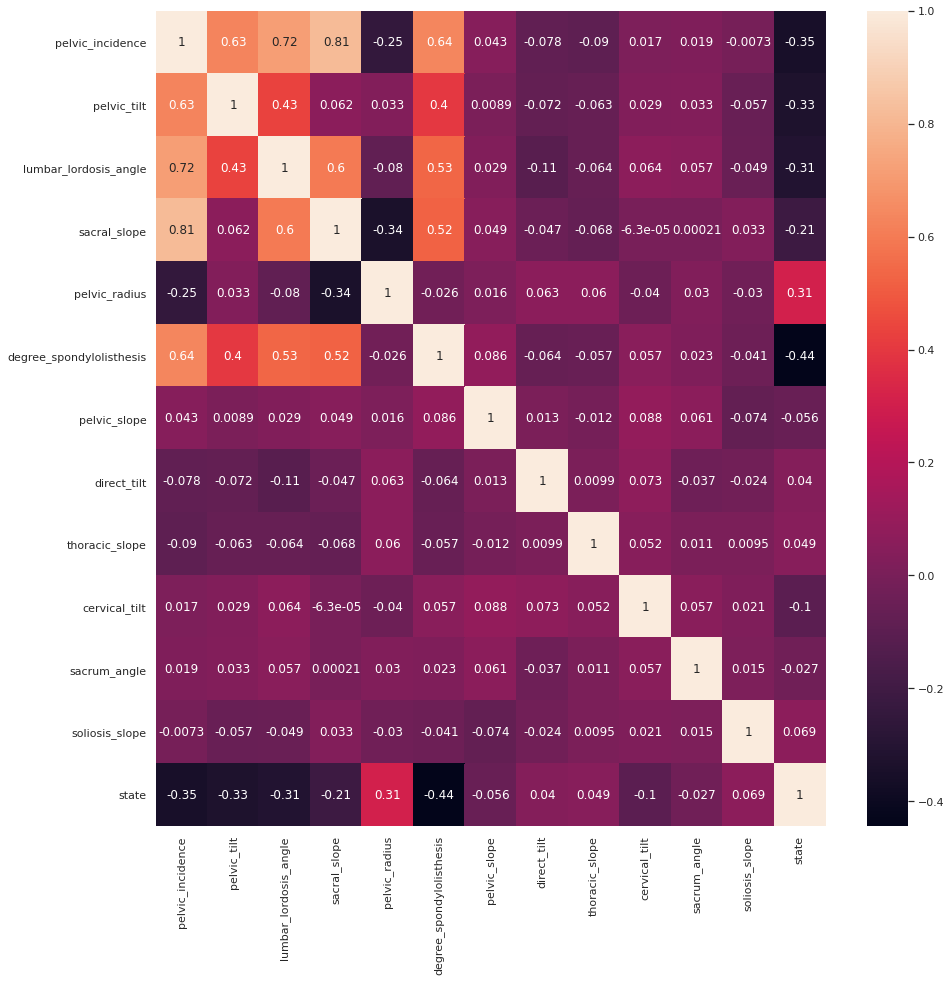

In [17]:
# Correlation matrix for original dataset
plt.figure(figsize=(15,15))
sns.heatmap(back_pain.corr(), annot = True);

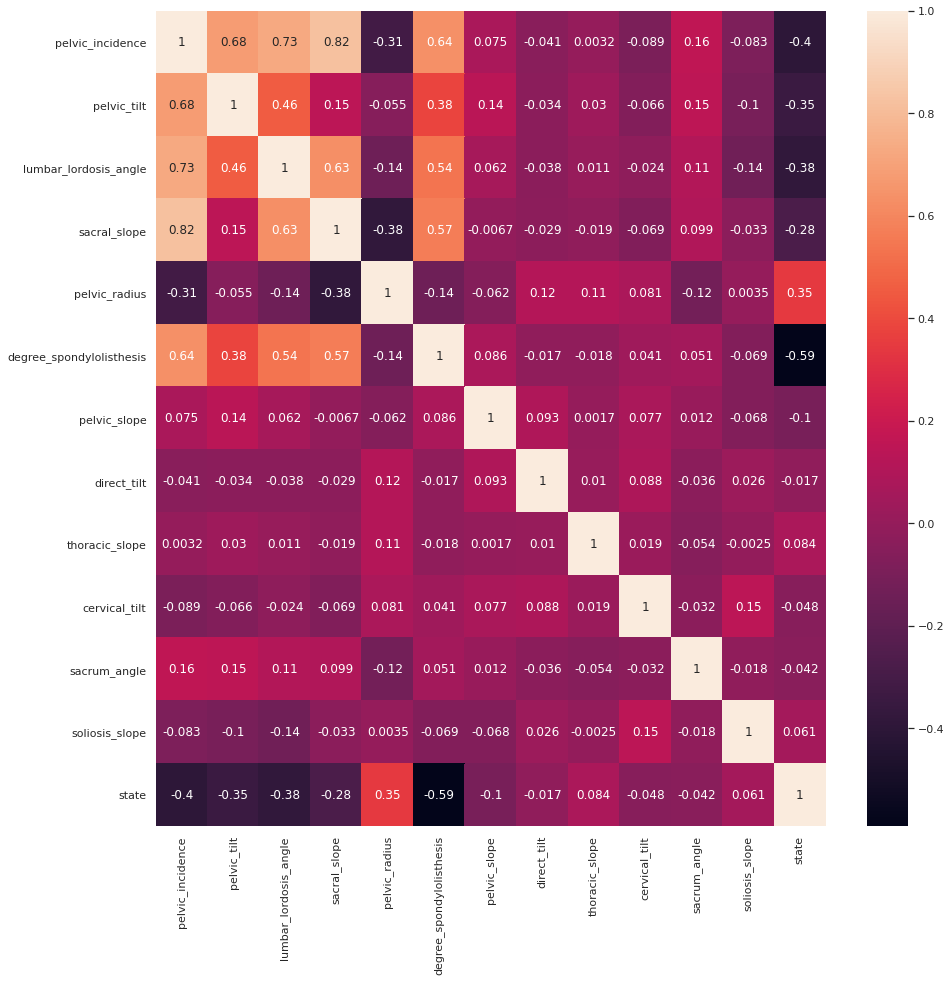

In [16]:
# Correlation matrix for synthetic dataset
plt.figure(figsize=(15,15))
sns.heatmap(pca_df.corr(), annot=True);